In [1]:
import os
os.chdir('/Users/ludo/Desktop/animalai/animalai')
from animalai.animalai.envs.gym.environment import AnimalAIGym
import random
from animalai.animalai.envs.arena_config import ArenaConfig

import yaml
import copy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# CONFIG
env_path = 'env/ludo_env7'
worker_id = 0
#random.randint(1, 100)
# competition_envs = os.listdir('../competition_configurations/')

seed = 1


yaml_path = 'examples/rand_env.yml'
ac = ArenaConfig(yaml_path)
# arena_path = "competition_configurations/5-10-3.yml" #'configurations/curriculum/0.yaml'
# ac = ArenaConfig(arena_path)
# ac.arenas[1] = copy.deepcopy(ac.arenas[0])

env = AnimalAIGym(environment_filename=env_path,
              worker_id=worker_id,
              n_arenas=1,
              arenas_configurations=ac,

                seed=seed,
                 grayscale=False)
# x = env.step([[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]])
# x = env.step([0,0])

# plt.axis('off')
# plt.imshow(env.render())
# plt.savefig('rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)
# env._env.arenas_obj_config_side_channel.arenas_config

5004


2020-06-07 15:32:40 INFO [environment.py:160] Connected to Unity environment with package version 0.15.0-preview and communication version 0.15.0
2020-06-07 15:32:40 INFO [environment.py:305] Connected new brain:
AnimalAI?team=0
2020-06-07 15:32:40 INFO [__init__.py:357] 1 agents within environment.
/Users/ludo/Desktop/animalai/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


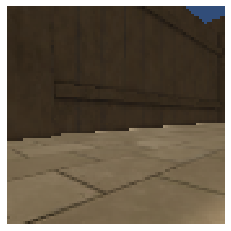

In [2]:
# env.reset()
for i in range(1):
    x = env.step([[0,0]])
plt.axis('off')
plt.imshow(env.render())
plt.savefig('rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)

# env._env.arenas_obj_config_side_channel.arenas_config

In [38]:
np.append(x[3]['batched_step_result'].obs[1].reshape(-1,9), np.array([0,0,0])).shape


(300,)

In [36]:
# env._env.DEFAULT_EDITOR_PORT
x[3]['batched_step_result'].obs[1].reshape(-1,9)[[0,11,22]][:, 0:6].flatten()

(18,)

In [4]:
obj_mapper = [
             "Cardbox1",
             "Cardbox2",
             "CylinderTunnelTransparent",
             "CylinderTunnel",
             "DeathZone",
             "GoodGoalMulti",
             "GoodGoal",
             "LObject",
             "LObject2",
             "Ramp",
             "UObject",
             "WallTransparent",
             "Wall",
              "BadGoal",
              "HotZone"]
res = x[3]['batched_step_result'].obs[1].reshape(-1,9)
df = pd.DataFrame(res[1:, :])
df.rename(inplace=True, columns={0: 'class', 1:'rotation', 2: 'occlusion%', 3:'pos_x', 4:'pos_y', 5:'pos_z', 6: 'size_x', 7: 'size_y', 8:'size_z'})
df['class'] = df['class'].apply(lambda x: obj_mapper[int(x)] if x!=-1.0 else 'null')
df_a = pd.DataFrame(res[0, :]).T
df_a.rename(inplace=True, columns={0: 'vel_x', 1:'vel_y', 2: 'vel_z', 3:'pos_x', 4:'pos_y', 5:'pos_z', 6: 'rot_x', 7: 'rot_y', 8:'rot_z'})
display(df)
display(df_a)


,class,rotation,occlusion%,pos_x,pos_y,pos_z,size_x,size_y,size_z
0,Wall,2.732752e-10,71.680435,20.000000,0.239750,2.5,4.98501,0.4995,4.985010
1,Wall,1.660041e-08,10.153546,19.999939,2.487505,22.5,0.98901,4.9950,34.955013
2,Wall,4.500000e+01,0.668213,30.000000,0.989000,30.0,4.99500,1.9980,0.499500
3,Wall,1.942358e+02,0.955759,10.000000,0.039950,20.0,7.99200,0.0999,6.993000
4,null,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.0,-1.00000,-1.0000,-1.000000
5,null,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.0,-1.00000,-1.0000,-1.000000
6,null,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.0,-1.00000,-1.0000,-1.000000
7,null,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.0,-1.00000,-1.0000,-1.000000
8,null,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.0,-1.00000,-1.0000,-1.000000
9,null,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.0,-1.00000,-1.0000,-1.000000


,vel_x,vel_y,vel_z,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z
0,0.0,0.0,0.0,20.0,0.9895,1.0,-0.0,0.0,0.0


In [2]:
env.close()

2020-06-07 14:52:16 INFO [environment.py:455] Environment shut down with return code 0.


In [ ]:
env.reset()
for _ in range(1):
    x = env.step([[0,0]])
    res = x[3]['batched_step_result'].obs[1][0]
    plt.axis('off')
    plt.imshow(res)
#     plt.savefig('rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)
    plt.show()
    res = x[3]['batched_step_result'].obs[1][1]
    plt.axis('off')
    plt.imshow(res)
#     plt.savefig('rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)
    plt.show()    

In [ ]:
env.close()

In [ ]:
env.visual_obs.shape

In [ ]:
x[3]['batched_step_result'].obs[1]

In [ ]:
from animalai.envs.gym.environment import AnimalAIGym
import random
from animalai.envs.arena_config import ArenaConfig

import os
import yaml
import copy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from animalai.envs.environment import AnimalAIEnvironment

# CONFIG
env_path = '../env/ludo_env7'
worker_id = 0
competition_envs = os.listdir('../competition_configurations/')

seed = 1


yaml_path = 'rand_env.yml'
ac = ArenaConfig(yaml_path)

env = AnimalAIEnvironment(
                    file_name=None,
                    arenas_configurations = ac,
                    worker_id=worker_id,
                    play=False, base_port=5004,
                    )
# env = AnimalAIGym(environment_filename=env_path,
#               worker_id=worker_id,
#               n_arenas=1,
#               arenas_configurations=ac,

#                 seed=seed,
#                  grayscale=False)
# x = env.step([[0,0]])

# plt.axis('off')
# plt.imshow(env.visual_obs)
# plt.savefig('rand_env.png',bbox_inches='tight',transparent=True, pad_inches=0)


In [ ]:
env.close()

In [ ]:
base = """!ArenaConfig
arenas:
  0: !Arena
    pass_mark: 4
    t: 250
    items:
    - !Item
      name: Agent
    - !Item
      name: CylinderTunnel
    - !Item
      name: GoodGoal
    - !Item
      name: Wall
"""